<a href="https://colab.research.google.com/github/tangirene/cs-4501/blob/main/irene_ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Frequency smoothing


In [ ]:
"""
questions for oh:
1. how to source/credit external resources
2. 'centering' mask when image size is even and mask size is odd?
  e.g. for 512x512 and 7x7, leave as 6x6?
3. clean up code necessary? e.g. prints
4. numpy.gradient automatically does central diff scheme?
"""

In [6]:
import numpy as np
from PIL import Image

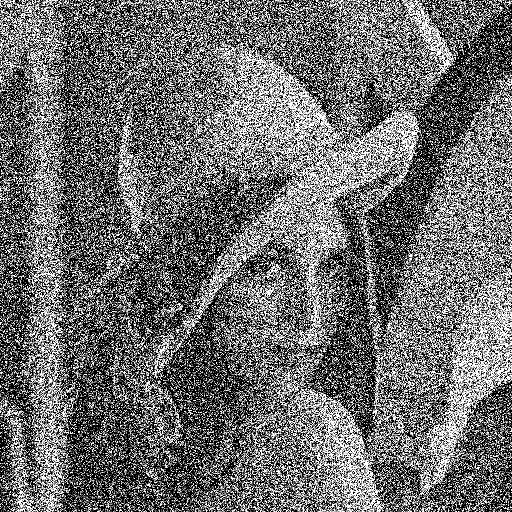

In [ ]:
# load image
image = Image.open("/content/drive/MyDrive/irene stuff/lenaNoise.png")
display(image)

In [ ]:
array = np.array(image)
print(array)
print(type(array))
print(array.shape)

[[255   0  90 ... 159  44  83]
 [182 255 255 ... 255 114 255]
 [179   0  31 ... 249 187  18]
 ...
 [  0   0  56 ... 152  71 185]
 [  0 108   0 ...   0  70   0]
 [  0  95   0 ... 207   0   0]]
<class 'numpy.ndarray'>
(512, 512)


In [ ]:
fft = np.fft.fft2(array)
print(fft)
print(fft.shape)

[[ 2.89270700e+07      +0.j         -1.98961715e+05+1747602.75720335j
   9.73926204e+05 -599117.35434791j ... -8.83395696e+04 -436891.19649332j
   9.73926204e+05 +599117.35434791j -1.98961715e+05-1747602.75720335j]
 [-7.89627886e+04 -659382.23859455j -7.88491611e+05+1148791.15511149j
  -7.70799123e+05 -202434.16386914j ...  4.00423648e+05 +732564.2142579j
  -2.08612390e+05 +181725.92101139j  5.79375127e+03 +814528.65267266j]
 [-3.73421134e+05  +47351.06349966j -2.03722387e+05 -131997.46352457j
   4.79196878e+05 -346785.78986061j ...  2.82718387e+05 +702176.07786461j
  -5.56228834e+05 -215918.5130415j   6.30464742e+05  -40857.96055961j]
 ...
 [ 3.12329639e+05 -214785.93534308j  5.29711101e+05 +490286.08162304j
  -4.06171850e+05 -124055.90823769j ...  7.06535023e+05 +115268.80590266j
   2.80102871e+04 -297036.70525557j  2.52447725e+04 +316798.20620438j]
 [-3.73421134e+05  -47351.06349966j  6.30464742e+05  +40857.96055961j
  -5.56228834e+05 +215918.5130415j  ... -3.25710784e+05 -406991.25

In [ ]:
# fftshift to move low freq to center)
fftshift = np.fft.fftshift(fft)
print(fftshift)

[[ 29658.            +0.j          29316.63163039+14477.69146795j
  -48512.14731403-40811.57080227j ...   1511.80146668+23127.64399522j
  -48512.14731403+40811.57080227j  29316.63163039-14477.69146795j]
 [-43290.90814853-17202.23732646j -52152.23577667-13174.37168505j
   12078.23873321+24490.04590063j ... -11931.87392537 +9623.00604827j
  -68413.90003696+35585.32460055j  29692.33311497 -3553.4446972j ]
 [-40758.05981   +54968.93354304j  22887.32683276 -3611.19920119j
  -48769.01445178+48446.91053499j ...  35808.89438379-50946.35403436j
  -29098.71790466+67625.36321637j  -8881.56102674 -7316.87425602j]
 ...
 [ 14534.28564232-35598.01797021j  38438.45103584-34823.94110166j
    1331.05647101+17953.11721513j ... -60551.73665555+17009.13871371j
    9254.34591982+11319.50873641j  34048.85524244+38866.22782328j]
 [-40758.05981   -54968.93354304j  -8881.56102674 +7316.87425602j
  -29098.71790466-67625.36321637j ...  11623.53048073 -2670.57769065j
  -48769.01445178-48446.91053499j  22887.326832

In [ ]:
# extract low frequencies w different mask sizes
# low pass filter
print(fftshift.dtype) # complex type
print(fftshift.shape) # image is even sized so fft center is a little "off"?

def low_pass_filter(fftshift, mask_size):
    image_y, image_x = fftshift.shape
    new_mask = np.zeros((image_y, image_x), dtype=np.complex128)
    center_y = image_y // 2
    center_x = image_x // 2

    half_mask_size = mask_size // 2

    # top
    y_min = max(0, center_y - half_mask_size)
    #print(y_min)
    # bottom
    y_max = min(image_y, center_y + half_mask_size + (mask_size % 2)) # adjust for odd mask
    #print(y_max)
    # left
    x_min = max(0, center_x - half_mask_size)
    #print(x_min)
    # right
    x_max = min(image_x, center_x + half_mask_size + (mask_size % 2))
    #print(x_max)

    new_mask[y_min:y_max, x_min:x_max] = 1 # up to but not including :_max

    apply_filter = fftshift * new_mask
    return apply_filter

complex128
(512, 512)


In [ ]:
# looking at mask dimms
print(low_pass_filter(fftshift, 3))

[[ 0.+0.j  0.+0.j  0.-0.j ...  0.+0.j -0.+0.j  0.+0.j]
 [ 0.-0.j  0.-0.j  0.+0.j ... -0.+0.j -0.+0.j  0.+0.j]
 [-0.+0.j  0.+0.j -0.+0.j ...  0.+0.j -0.+0.j  0.-0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ... -0.+0.j  0.+0.j  0.+0.j]
 [ 0.-0.j -0.+0.j  0.-0.j ...  0.+0.j  0.-0.j  0.+0.j]
 [-0.+0.j  0.+0.j  0.-0.j ...  0.-0.j  0.+0.j -0.+0.j]]


In [ ]:
print (3//2)
print(fftshift.shape[0])
# reconstruct the og image by using new generated freqs ^
mask_sizes = [3, 7, 15, 31, 95, fftshift.shape[0]] #512
reconstructed_imgs = []
for size in mask_sizes:
    filtered = low_pass_filter(fftshift, size) # apply low pass filter
    f_ishift = np.fft.ifftshift(filtered) # undo fftshift
    reconstruct = np.fft.ifft2(f_ishift) # reconstruct img
    reconstruct = np.real(reconstruct) # plt.imshow expects reals
    reconstructed_imgs.append((size, reconstruct))

1
512


In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(1, 7, 1) # start at 1
plt.imshow(array, cmap="gray")
plt.title("lenaNoise.png")
plt.axis("off")

for i, (size, reconstruct) in enumerate(reconstructed_imgs, 2): # start at 2
    plt.subplot(1, 7, i)
    plt.imshow(reconstruct, cmap='gray')
    plt.title(f"Low-pass filter size: {size}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Gradient descent implementation

In [ ]:

"""
- apply gd on tv/rof model
- implement ur own gd

implement your own gd algorithm
1. with given einsten.jpeg, generate different nosiy images w additive gaussian noises at diff variance
2. use central diff scheme to compute image gradient (numpy.gradient)
  use your own divergence operator
3. run algorithm on generated images from (1)
  may need to tune weighting parameter and learning rate
4. plot convergence graph reporting objective fx over all iters
"""

In [ ]:
"""
GD = minE(u) = lambda * ||f - u||_L2^2 + ||grad(u)||
"""

In [35]:
!pip install ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00


In [39]:
import os
import ipdb
class denoiser:
    def __init__(self, f, alpha, lambda_):
        self.f = f.astype(np.float64) / 255.0
        self.u = self.f.copy()  # initialize denoised/unknown image = noisy image
        # params for gd
        self.alpha = alpha
        self.lambda_ = lambda_
        self.energy_history = [] # check

    def compute_energy(self):
        # data fit term = lambda * ||f-u|| = lam * sum(f-u)^2
        data_fitting_term = self.lambda_ * np.sum((self.f - self.u)**2)

        # regularization term  = integral(||gradient(u)|| but img is discerete so use central diff scheme
          # sum(||gradient(u)||)
          # sum((np.gradient(u_x)^2)) + np.gradient(u_y)^2

          # np gradient returns rows (y) first then cols (x)?
        grad_u_x = np.gradient(self.u, axis=1)
        grad_u_y = np.gradient(self.u, axis=0)
        total_variation = np.sqrt(grad_u_x**2 + grad_u_y**2)

        regularization_term = np.sum(total_variation)

        return data_fitting_term + regularization_term

    def compute_divergence(self, px, py):
        """.
        div(p) = d(px)/dx + d(py)/dy for x y directions
        compute gradient twice along x, y twice
        """
        div_px_dx = np.gradient(px, axis=1)
        div_py_dy = np.gradient(py, axis=0)

        return div_px_dx + div_py_dy

    def gradient_descent_step(self):
        """
        u_k+1 = u_k - alpha * grad_E(u_k)
        """
        #divergence term = compute_divergence(self, x, y) / ||grad(u)||
        """
        grad_u_x = np.gradient(self.u, axis=1)
        grad_u_y = np.gradient(self.u, axis=0)
        total_variation = np.sqrt(grad_u_x**2 + grad_u_y**2) + 1e-8

        divergence_term = self.compute_divergence(grad_u_x, grad_u_y) / total_variation
        gradient_E = -2 * self.lambda_ * (self.f - self.u) - divergence_term

        self.u -= self.alpha * gradient_E
        """
        grad_u_x = np.gradient(self.u, axis=1)
        grad_u_y = np.gradient(self.u, axis=0)

        grad_magnitude = np.sqrt(grad_u_x**2 + grad_u_y**2) + 1e-8

        normalized_grad_u_x = grad_u_x / grad_magnitude
        normalized_grad_u_y = grad_u_y / grad_magnitude

        divergence_term = self.compute_divergence(normalized_grad_u_x, normalized_grad_u_y)

        grad_E = -2 * self.lambda_ * (self.f - self.u) - divergence_term
        # update image
        self.u -= self.alpha * grad_E

    def run_denoising(self, iterations):
       """
       run gd for # of iters
       """
       for i in range(iterations):
        self.gradient_descent_step()
        energy = self.compute_energy()
        #ipdb.set_trace()
        self.energy_history.append(energy)
        if (i + 1) % 50 == 0:
            print(f"Iteration {i+1}: Energy = {energy:.4f}")

    def save_results(self, output_dir, file_prefix):
        # create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        # save the denoised image
        denoised_image = np.clip(self.u * 255, 0, 255).astype(np.uint8)
        pil_image = Image.fromarray(denoised_image)
        image_filename = os.path.join(output_dir, f"{file_prefix}_denoised.png")
        pil_image.save(image_filename)
        print(f"Denoised image saved to: {image_filename}")

        # plot the convergence graph
        plt.figure()
        print(self.energy_history[50])
        plt.plot(self.energy_history)
        plt.title(f'Convergence Graph ({file_prefix})')
        plt.xlabel('Iterations')
        plt.ylabel('Energy E(u)')
        plt.grid(True)
        graph_filename = os.path.join(output_dir, f"{file_prefix}_convergence.png")
        plt.savefig(graph_filename)
        print(f"Convergence graph saved to: {graph_filename}")
        plt.close()


In [41]:
def generate_noisy_image(image, sigma):
    # normalizie image from [0,255] to [0,1], keep noisy img b&w
  img_array = np.array(image.convert('L')) / 255.0
  noise = np.random.normal(0, sigma, img_array.shape) # normal/gaussian dist
  #higher variance = stronger noise
  noisy_img = img_array + noise
  # clip to keep in [0,1]
  noisy_img = np.clip(noisy_img, 0, 1)
  #convert back to img
  noisy_img = (noisy_img * 255).astype(np.uint8)
  return Image.fromarray(noisy_img)

if __name__ == '__main__':
    try:
        original_image = Image.open("/content/drive/MyDrive/irene stuff/Einstein.jpeg")
    except FileNotFoundError:
        print("file not found")
        exit()

    noise_parameters = {
        'sigma_0.01': {'sigma': 0.01, 'lambda': 100, 'alpha': 0.0005},
        'sigma_0.05': {'sigma': 0.05, 'lambda': 50, 'alpha': 0.01},
        'sigma_0.1': {'sigma': 0.1, 'lambda': 20, 'alpha': 0.005},
    } # iterate through a list of params instead of hardcoding?
  # decrease lambda
    # iterate
    for label, params in noise_parameters.items():
        print(f"\nProcessing image with noise level: {params['sigma']}")

        noisy_img = generate_noisy_image(original_image, params['sigma'])

        noisy_img_array = np.array(noisy_img)

        denoiser_instance = denoiser(
            f=noisy_img_array,
            alpha=params['alpha'],
            lambda_=params['lambda']
        )

        denoiser_instance.run_denoising(iterations=300)

        denoiser_instance.save_results(output_dir='denoising_results', file_prefix=label)


Processing image with noise level: 0.01
Iteration 50: Energy = 2167.7278
Iteration 100: Energy = 2167.7328
Iteration 150: Energy = 2167.7347
Iteration 200: Energy = 2167.7349
Iteration 250: Energy = 2167.7315
Iteration 300: Energy = 2167.7336
Denoised image saved to: denoising_results/sigma_0.01_denoised.png
2167.728520214674
Convergence graph saved to: denoising_results/sigma_0.01_convergence.png

Processing image with noise level: 0.05
Iteration 50: Energy = 3587.1373
Iteration 100: Energy = 3587.3440
Iteration 150: Energy = 3587.3271
Iteration 200: Energy = 3587.3933
Iteration 250: Energy = 3587.3199
Iteration 300: Energy = 3587.3811
Denoised image saved to: denoising_results/sigma_0.05_denoised.png
3586.615548176094
Convergence graph saved to: denoising_results/sigma_0.05_convergence.png

Processing image with noise level: 0.1
Iteration 50: Energy = 5332.2702
Iteration 100: Energy = 5332.3258
Iteration 150: Energy = 5332.2791
Iteration 200: Energy = 5332.2934
Iteration 250: Energy

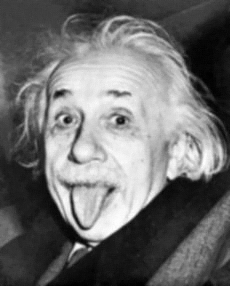

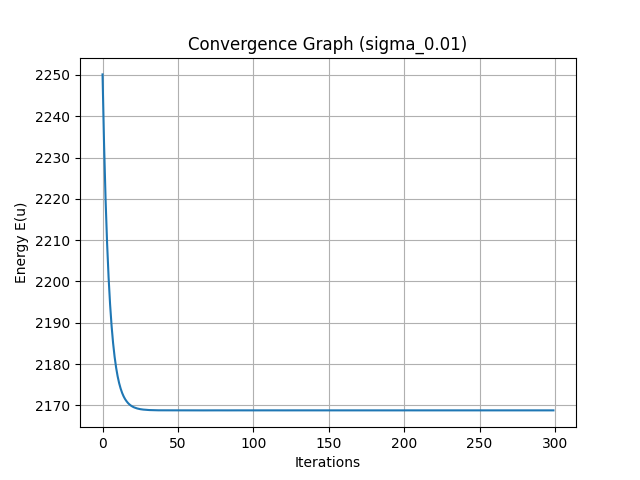

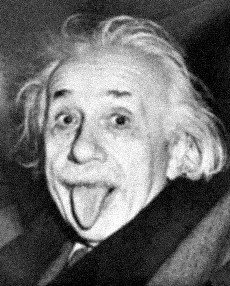

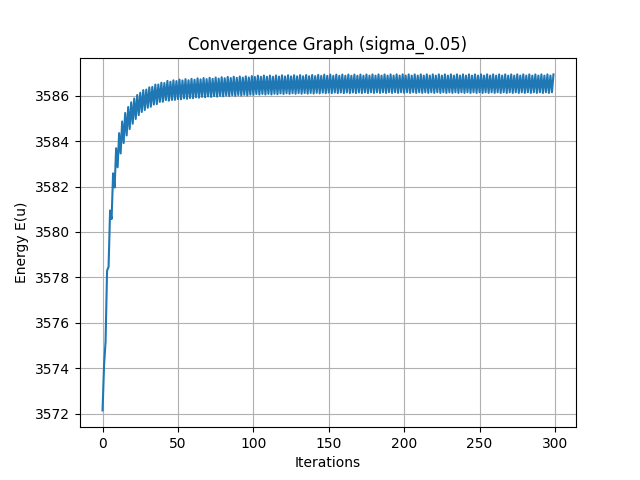

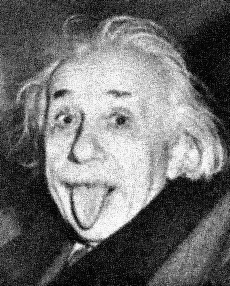

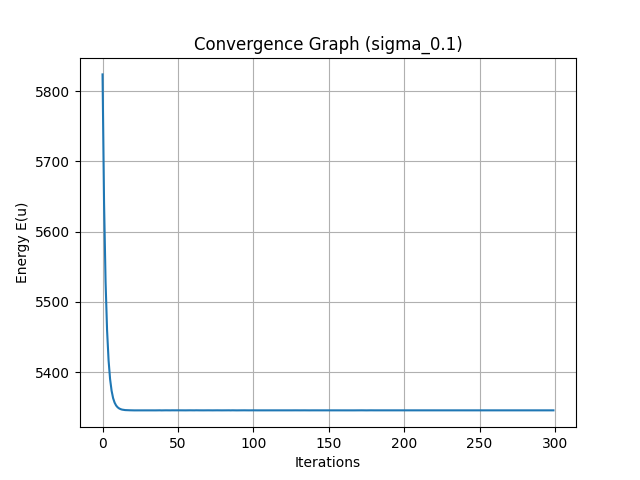

In [34]:
# display original image
#img = Image.open("/content/drive/MyDrive/irene stuff/Einstein.jpeg")
#display(img)

img1 = Image.open("/content/denoising_results/sigma_0.01_denoised.png")
display(img1)
img1_2 = Image.open("/content/denoising_results/sigma_0.01_convergence.png")
display(img1_2)
img2 = Image.open("/content/denoising_results/sigma_0.05_denoised.png")
display(img2)
img2_2 = Image.open("/content/denoising_results/sigma_0.05_convergence.png")
display(img2_2)
img3 = Image.open("/content/denoising_results/sigma_0.1_denoised.png")
display(img3)
img3_2 = Image.open("/content/denoising_results/sigma_0.1_convergence.png")
display(img3_2)
#img4 = Image.open("/content/denoising_results/sigma_0.5_denoised.png")
#img4_2 = Image.open("/content/denoising_results/sigma_0.5_convergence.png")

#og_img4 = display(generate_noisy_image(original_image, 0.5))
#display(img4, img4_2)